In [1]:
#import libraries
import pandas as pd

In [2]:
#import the data
ufc_data = pd.read_csv('UFC_Fighter_Statistics.csv')

In [5]:
#count null values
print(ufc_data.isnull().sum())

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [7]:
ufc_data.shape

(4111, 18)

In [9]:
# Fill missing values in reach_in_cm with corresponding height_cm values
ufc_data = ufc_data.assign(reach_in_cm=ufc_data['reach_in_cm'].fillna(ufc_data['height_cm']))

In [11]:
print(ufc_data.isnull().sum())

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                      297
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [13]:
# Drop the nickname column
ufc_data = ufc_data.drop(columns=['nickname'])

In [15]:
print(ufc_data.isnull().sum())

name                                               0
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                      297
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [17]:
# Convert date_of_birth to datetime format
ufc_data['date_of_birth'] = pd.to_datetime(ufc_data['date_of_birth'], errors='coerce')

# Calculate age
today = pd.to_datetime("today")
ufc_data['age'] = (today - ufc_data['date_of_birth']).dt.days // 365

# Drop the original date_of_birth column
ufc_data = ufc_data.drop(columns=['date_of_birth'])

In [19]:
# Fill missing values in age with the average age (rounded to nearest integer)
ufc_data['age'] = ufc_data['age'].fillna(ufc_data['age'].mean()).astype(int)

In [21]:
ufc_data.head

<bound method NDFrame.head of                    name  wins  losses  draws  height_cm  weight_in_kg  \
0       Robert Drysdale     7       0      0     190.50         92.99   
1     Daniel McWilliams    15      37      0     185.42         83.91   
2            Dan Molina    13       9      0     177.80         97.98   
3             Paul Ruiz     7       4      0     167.64         61.23   
4       Collin Huckbody     8       2      0     190.50         83.91   
...                 ...   ...     ...    ...        ...           ...   
4106    John Campetella     0       1      0     175.26        106.59   
4107  Andre Pederneiras     1       1      2     172.72         70.31   
4108      Bryson Kamaka    12      20      1     180.34         77.11   
4109        Matej Penaz     6       1      0     190.50         83.91   
4110     Pauline Macias     4       1      0     162.56         52.16   

      reach_in_cm    stance  significant_strikes_landed_per_minute  \
0          190.50  Orth

In [23]:
print(ufc_data.isnull().sum())

name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                       298
weight_in_kg                                     87
reach_in_cm                                     297
stance                                          823
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
age                                               0
dtype: int64


In [25]:
# Fill missing values in stance with 'Orthodox' because 80% of all fighters are orthodox
ufc_data['stance'] = ufc_data['stance'].fillna('Orthodox')

In [27]:
print(ufc_data.isnull().sum())

name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                       298
weight_in_kg                                     87
reach_in_cm                                     297
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
age                                               0
dtype: int64


In [29]:
# Fill missing values in numeric columns with their respective column means
ufc_data = ufc_data.fillna(ufc_data.mean(numeric_only=True))

In [31]:
print(ufc_data.isnull().sum())

name                                            0
wins                                            0
losses                                          0
draws                                           0
height_cm                                       0
weight_in_kg                                    0
reach_in_cm                                     0
stance                                          0
significant_strikes_landed_per_minute           0
significant_striking_accuracy                   0
significant_strikes_absorbed_per_minute         0
significant_strike_defence                      0
average_takedowns_landed_per_15_minutes         0
takedown_accuracy                               0
takedown_defense                                0
average_submissions_attempted_per_15_minutes    0
age                                             0
dtype: int64


In [33]:
ufc_data.head

<bound method NDFrame.head of                    name  wins  losses  draws  height_cm  weight_in_kg  \
0       Robert Drysdale     7       0      0     190.50         92.99   
1     Daniel McWilliams    15      37      0     185.42         83.91   
2            Dan Molina    13       9      0     177.80         97.98   
3             Paul Ruiz     7       4      0     167.64         61.23   
4       Collin Huckbody     8       2      0     190.50         83.91   
...                 ...   ...     ...    ...        ...           ...   
4106    John Campetella     0       1      0     175.26        106.59   
4107  Andre Pederneiras     1       1      2     172.72         70.31   
4108      Bryson Kamaka    12      20      1     180.34         77.11   
4109        Matej Penaz     6       1      0     190.50         83.91   
4110     Pauline Macias     4       1      0     162.56         52.16   

      reach_in_cm    stance  significant_strikes_landed_per_minute  \
0          190.50  Orth

In [35]:
ufc_data.dtypes

name                                             object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    float64
age                                               int64
dtype: object

In [37]:
ufc_data["strike_differential"] = (
    ufc_data["significant_strikes_landed_per_minute"] - 
    ufc_data["significant_strikes_absorbed_per_minute"]
)

In [39]:
ufc_data["win_percentage"] = ufc_data["wins"] / (ufc_data["wins"] + ufc_data["losses"] + ufc_data["draws"])

In [41]:
ufc_data=ufc_data.dropna()

In [43]:
ufc_data.head()

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,age,strike_differential,win_percentage
0,Robert Drysdale,7,0,0,190.50,92.99,190.50,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,43,0.00,1.000000
1,Daniel McWilliams,15,37,0,185.42,83.91,185.42,Orthodox,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,38,3.36,0.288462
2,Dan Molina,13,9,0,177.80,97.98,177.80,Orthodox,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,38,-5.58,0.590909
3,Paul Ruiz,7,4,0,167.64,61.23,167.64,Orthodox,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,38,0.00,0.636364
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,30,-0.68,0.800000


In [45]:
#Creating the weigh_class column
def categorize_weight_class(weight):
    if pd.isnull(weight):
        return "Unknown"

    weight_class_ranges = [
        ("Flyweight", 0.0, 61.1),
        ("Bantamweight", 61.1, 65.7),
        ("Featherweight", 65.7, 70.2),
        ("Lightweight", 70.2, 77.0),
        ("Welterweight", 77.0, 83.8),
        ("Middleweight", 83.8, 92.9),
        ("Light Heavyweight", 92.9, 120.2),
        ("Heavyweight", 120.2, float('inf'))
    ]

    for class_name, low, high in weight_class_ranges:
        if low <= weight <= high:
            return class_name

    return "Unknown"

ufc_data = ufc_data.assign(
    weight_class=ufc_data['weight_in_kg'].apply(categorize_weight_class)
)



In [47]:
#Making weigh class dataframes
weight_class_ranges = [
        ("Flyweight", 0.0, 61.1),
        ("Bantamweight", 61.1, 65.7),
        ("Featherweight", 65.7, 70.2),
        ("Lightweight", 70.2, 77.0),
        ("Welterweight", 77.0, 83.8),
        ("Middleweight", 83.8, 92.9),
        ("Light Heavyweight", 92.9, 120.2),
        ("Heavyweight", 120.2, float('inf'))
]

# Split into DataFrames with a small tolerance for boundary issues
weight_class_dfs = {}

tolerance = 1e-6  # Small tolerance to handle floating-point precision errors

for class_name, low, high in weight_class_ranges:
    weight_class_dfs[class_name] = ufc_data[
        (ufc_data['weight_in_kg'] >= low - tolerance) & (ufc_data['weight_in_kg'] <= high + tolerance)
    ]



In [49]:
flyweight_df         = weight_class_dfs["Flyweight"]
bantamweight_df      = weight_class_dfs["Bantamweight"]
featherweight_df     = weight_class_dfs["Featherweight"]
lightweight_df       = weight_class_dfs["Lightweight"]
welterweight_df      = weight_class_dfs["Welterweight"]
middleweight_df      = weight_class_dfs["Middleweight"]
light_heavyweight_df = weight_class_dfs["Light Heavyweight"]
heavyweight_df       = weight_class_dfs["Heavyweight"]


In [51]:
flyweight_df.shape

(416, 20)

In [53]:
bantamweight_df.shape

(472, 20)

In [55]:
featherweight_df.shape

(465, 20)

In [57]:
lightweight_df.shape

(648, 20)

In [59]:
welterweight_df.shape

(707, 20)

In [61]:
middleweight_df.shape

(557, 20)

In [63]:
light_heavyweight_df.shape

(781, 20)

In [65]:
heavyweight_df.shape

(115, 20)

Best Parameters: {'model__learning_rate': 0.03, 'model__max_depth': 3, 'model__n_estimators': 200}

Average RMSE: 0.1741
Average R²: 0.1976
RMSE per fold: [0.1660393448721911, 0.17804360768671124, 0.1782066438344551, 0.17548475677112274, 0.17263409871918023]
R² per fold: [0.15261286848278155, 0.22605162742132512, 0.1866174495909695, 0.19039257491394257, 0.23208685780089144]


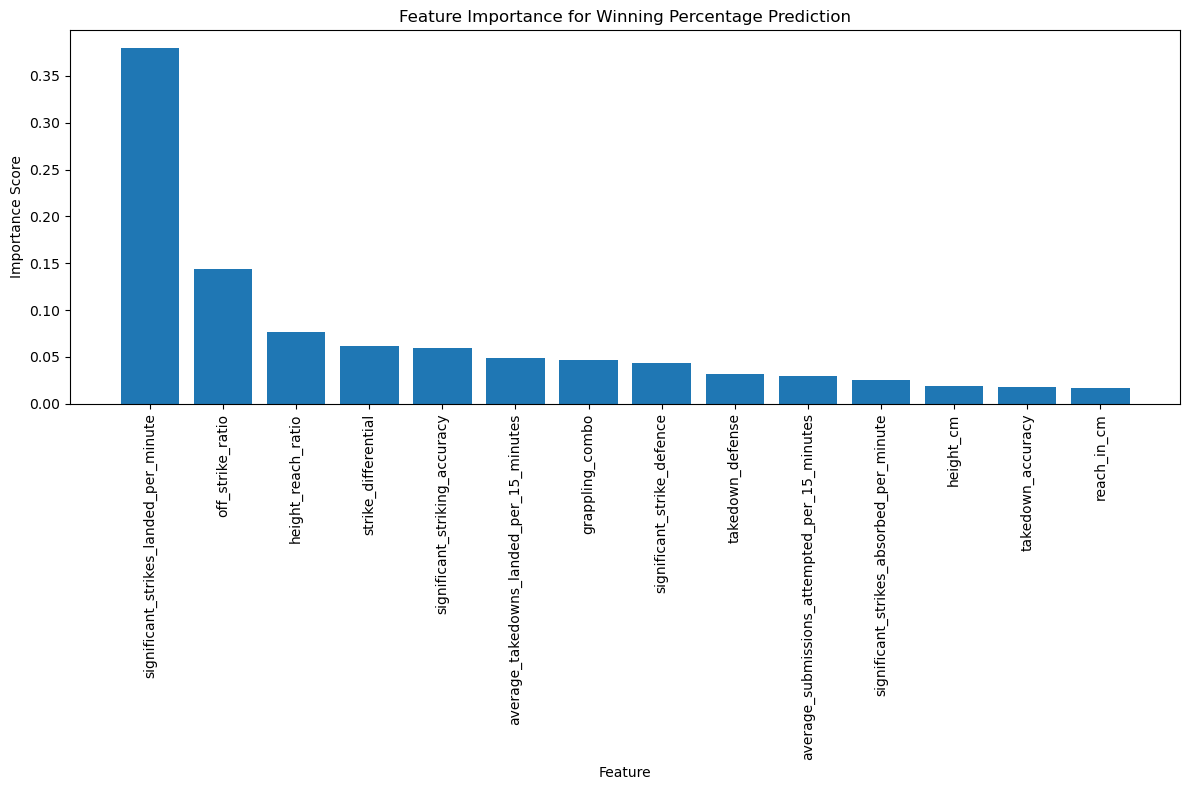

In [67]:
#Gradient Boosting Model with K-Fold Cross Validation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Copy the original dataset
fighter_data = ufc_data.copy()

# Feature Engineering
fighter_data["height_reach_ratio"] = fighter_data["height_cm"] / fighter_data["reach_in_cm"]
fighter_data["off_strike_ratio"] = fighter_data["significant_strikes_landed_per_minute"] / (
    fighter_data["significant_strikes_absorbed_per_minute"] + 1e-6)
fighter_data["grappling_combo"] = (
    fighter_data["average_takedowns_landed_per_15_minutes"] +
    fighter_data["average_submissions_attempted_per_15_minutes"]
)

# Drop irrelevant or non-numeric columns
fighter_data = fighter_data.drop(columns=["name", "stance", "age", "weight_in_kg", "wins", "losses", "draws", "weight_class"], errors="ignore")

# Drop missing/infinite values
fighter_data = fighter_data.replace([np.inf, -np.inf], np.nan).dropna()

# Define X and y
X = fighter_data.drop(columns=["win_percentage"])
y = fighter_data["win_percentage"]

# Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", xgb.XGBRegressor(random_state=42, verbosity=0))
])

# Grid Search Parameters
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.01, 0.03],
    "model__max_depth": [3, 4, 5]
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X, y)

# Best Estimator
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate Model
rmse_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"\nAverage RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")
print(f"RMSE per fold: {rmse_scores}")
print(f"R² per fold: {r2_scores}")

# Manual Feature Importance Plotting (Features on X-axis) - Larger Figure
importance = best_model.named_steps['model'].feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 8))  # Increased figure size (width, height)
plt.bar(range(len(importance)), importance[sorted_indices], align='center')
plt.xticks(range(len(importance)), feature_names[sorted_indices], rotation='vertical')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.title('Feature Importance for Winning Percentage Prediction')
plt.tight_layout()
plt.show()

In [68]:
#Making Predictions Using the Flyweight Dataset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use your DataFrame
df = flyweight_df.drop_duplicates(subset="name").set_index("name")

# Simulate 5,000 random matchups
matchups = pd.DataFrame({
    "fighter_1": np.random.choice(df.index, 5000),
    "fighter_2": np.random.choice(df.index, 5000)
})

# Drop rows where both fighters are the same
matchups = matchups[matchups["fighter_1"] != matchups["fighter_2"]]

# Merge fighter stats
f1 = df.add_prefix("f1_")
f2 = df.add_prefix("f2_")

matchups = matchups.join(f1, on="fighter_1")
matchups = matchups.join(f2, on="fighter_2")

# List of numerical features to calculate differences for
numerical_cols = [
    "losses", "draws", "height_cm", "weight_in_kg", "reach_in_cm",
    "significant_strikes_landed_per_minute", "significant_striking_accuracy",
    "significant_strikes_absorbed_per_minute", "significant_strike_defence",
    "average_takedowns_landed_per_15_minutes", "takedown_accuracy", "takedown_defense",
    "average_submissions_attempted_per_15_minutes", "age"
]

# Calculate feature differences
features = []
for col in numerical_cols:
    diff_col = f"{col}_diff"
    matchups[diff_col] = matchups[f"f1_{col}"] - matchups[f"f2_{col}"]
    features.append(diff_col)

# Create labels using wins as a proxy for skill (1 if fighter_1 has more wins)
matchups["label"] = (matchups["f1_wins"] > matchups["f2_wins"]).astype(int)

# Prepare data for training
X = matchups[features]
y = matchups["label"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train a classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Accuracy on test data
print("Model accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Predict matchup outcome
def predict_winner(fighter_1, fighter_2):
    try:
        f1_stats = df.loc[fighter_1]
        f2_stats = df.loc[fighter_2]
    except KeyError:
        return "One or both fighter names not found."

    row = {}
    for col in numerical_cols:
        row[f"{col}_diff"] = f1_stats[col] - f2_stats[col]

    input_df = pd.DataFrame([row])
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][pred]

    winner = fighter_1 if pred == 1 else fighter_2
    return f"{winner} is more likely to win (Confidence: {prob:.2f})"


Model accuracy: 0.7415730337078652


In [69]:
flyweight_df.head(10)

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,age,strike_differential,win_percentage,weight_class
13,Megumi Fujii,26,3,0,160.02,51.26,160.02,Orthodox,2.40,42.0,0.00,100.0,0.00,0.0,0.0,12.0,38,2.40,0.896552,Flyweight
22,Dione Barbosa,6,2,0,167.64,56.70,167.64,Orthodox,0.87,50.0,0.65,66.0,3.27,100.0,0.0,9.8,33,0.22,0.750000,Flyweight
37,Klayton Mai,8,3,0,175.26,56.70,175.26,Orthodox,1.53,42.0,1.02,63.0,3.83,100.0,0.0,7.7,38,0.51,0.727273,Flyweight
64,Nick Garcia,8,3,0,162.56,56.70,162.56,Orthodox,0.67,25.0,3.03,50.0,0.00,0.0,83.0,5.1,38,-2.36,0.727273,Flyweight
69,Ronaldo Candido,6,0,0,167.64,56.70,167.64,Southpaw,1.67,42.0,3.87,52.0,8.00,53.0,0.0,5.0,36,-2.20,1.000000,Flyweight
72,Billy Pasulatan,10,3,0,165.10,56.70,167.64,Switch,0.65,20.0,5.22,48.0,0.00,0.0,0.0,4.9,33,-4.57,0.769231,Flyweight
81,Jimmy Flick,16,7,0,170.18,56.70,172.72,Orthodox,1.99,50.0,5.05,38.0,1.66,27.0,0.0,4.4,34,-3.06,0.695652,Flyweight
82,Kaline Medeiros,8,5,0,160.02,52.16,160.02,Orthodox,2.06,70.0,0.29,83.0,4.41,100.0,0.0,4.4,38,1.77,0.615385,Flyweight
83,Takeru Uchida,6,1,0,165.10,56.70,172.72,Southpaw,0.00,0.0,0.00,0.0,0.00,0.0,0.0,4.4,22,0.00,0.857143,Flyweight
101,Karine Silva,17,4,0,165.10,56.70,170.18,Orthodox,3.37,35.0,3.37,50.0,2.45,60.0,0.0,4.1,31,0.00,0.809524,Flyweight


In [70]:
predict_winner("Alexandre Pantoja", "Brandon Moreno")
#they have fought 3 times and its 3-0


'Brandon Moreno is more likely to win (Confidence: 0.70)'

In [71]:
predict_winner("Francisco Figueiredo", "Brandon Moreno")
#they have fought 3 times and its 1-1-1

'Brandon Moreno is more likely to win (Confidence: 0.72)'

In [72]:
predict_winner("Demetrious Johnson", "Alexandre Pantoja")

'Demetrious Johnson is more likely to win (Confidence: 0.59)'

In [73]:
predict_winner("Kai Kara-France", "Brandon Moreno")
#they have fought twice and its 0-2

'Brandon Moreno is more likely to win (Confidence: 0.54)'